- Loại trang sức nào được sử dụng trong các sản phẩm?
- Kim loại (metal) nào được sử dụng nhiều nhất?
- Gía trung bình của đồ trang sức phan theo kim loại là bao nhiêu?
- Gía trung bình của mỗi kim loại là bao nhiêu?
- Có bao nhiêu trang sức trong mỗi loại sản phẩm?
- Gía trung bình của trang sức trong mỗi loại sản phẩm?
- Top loại trang sức đắt tiền nhất?

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cartier = pd.read_csv('cartier_catalog.csv')
cartier.head(5)

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [3]:
cartier.tags.value_counts()

tags
white gold, diamonds                                         121
pink gold, diamonds                                          100
yellow gold, diamonds                                         60
yellow gold                                                   45
pink gold                                                     38
                                                            ... 
pink gold, black lacquer, onyx, tsavorite garnets              1
white gold, lacquer, tsavorite garnets, onyx                   1
pink gold, emeralds, obsidians, diamonds                       1
yellow gold, emeralds, chrysoprases, carnelians, diamonds      1
white gold, pearl                                              1
Name: count, Length: 103, dtype: int64

In [4]:
cartier['tags']

0               yellow gold
1                  platinum
2                 pink gold
3                white gold
4               yellow gold
               ...         
687               pink gold
688               pink gold
689     pink gold, diamonds
690    pink gold, amazonite
691      yellow gold, coral
Name: tags, Length: 692, dtype: object

In [5]:
metal = lambda material:material.split(',')[0]
#metal1 = lambda mater:mater.split(',')[1]
#metal2 = lambda material:material.split(',')[2]
#metal3 = lambda material:material.split(',')[3]
#metal4 = lambda material:material.split(',')[4]

In [6]:
metal1 = lambda mater:mater.split(',')[1] if len(mater.split(',')) > 1 else None

In [13]:
metal2 = lambda mater:mater.split(',')[2] if len(mater.split(',')) > 2 else None
metal3 = lambda mater:mater.split(',')[3] if len(mater.split(',')) > 3 else None
metal4 = lambda mater:mater.split(',')[4] if len(mater.split(',')) > 4 else None

In [8]:

cartier['metal'] = cartier['tags'].apply(metal)
#cartier['first_gen'] = cartier['tags'].apply(metal1)
#cartier['second_gen'] = cartier['tags'].apply(metal2)
#cartier['third_gen'] = cartier['tags'].apply(metal3)
#cartier['fouth_gen'] = cartier['tags'].apply(metal4)

In [9]:
cartier['first_gen'] = cartier['tags'].apply(metal1)

In [14]:
cartier['second_gen'] = cartier['tags'].apply(metal2)
cartier['third_gen'] = cartier['tags'].apply(metal3)
cartier['fouth_gen'] = cartier['tags'].apply(metal4)

In [20]:
cartier.head(5)

,categorie,price,metal,first_gen,second_gen,third_gen,fouth_gen
0,rings,1650.0,yellow gold,None,None,None,None
1,rings,3650.0,platinum,None,None,None,None
2,rings,1650.0,pink gold,None,None,None,None
3,rings,1770.0,white gold,None,None,None,None
4,rings,1070.0,yellow gold,None,None,None,None


In [19]:
cartier.drop(['ref','image','tags','title','description'], axis=1, inplace=True)


In [21]:
gems = pd.concat([cartier['first_gen'], cartier['second_gen'], cartier['third_gen'], cartier['fouth_gen']], axis=0)

In [24]:
gems_value = gems.value_counts()[1:].to_frame()

In [26]:
gems_value.reset_index(inplace=True)

In [27]:
gems_value.columns = ['gem_type', 'count']

- Loại trang sức nào được sử dụng trong các sản phẩm?

In [28]:
gems_value

,gem_type,count
0,onyx,90
1,emeralds,70
2,diamond,61
3,yellow gold,37
4,pink gold,37
5,tsavorite garnets,35
6,sapphires,19
7,ceramic,17
8,lacquer,11
9,mother-of-pearl,9


<function matplotlib.pyplot.show(close=None, block=None)>

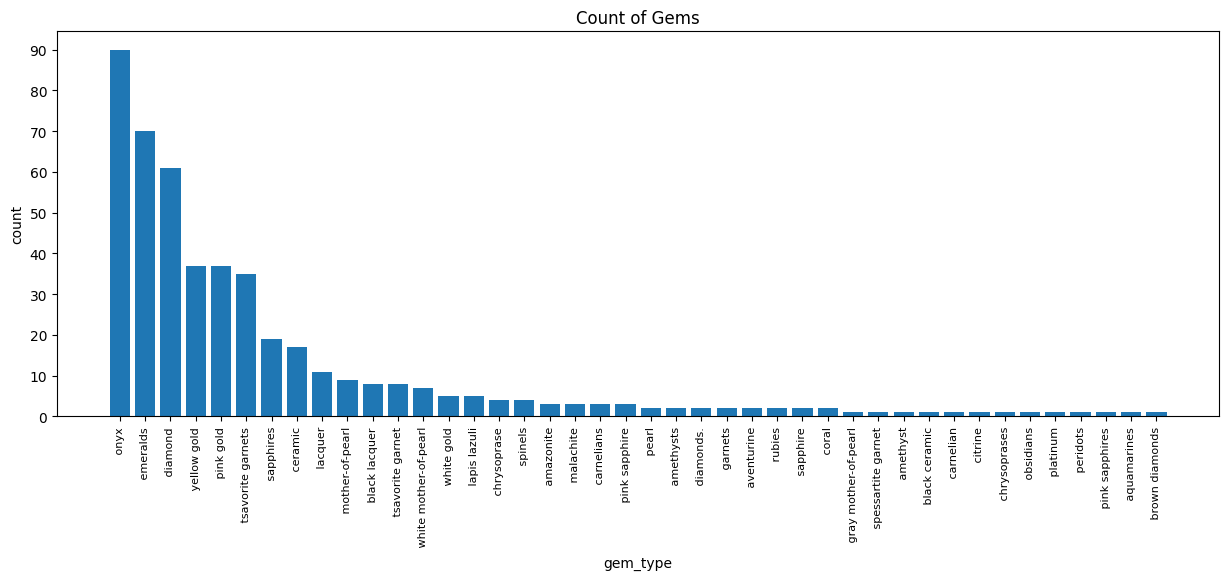

In [42]:
a = gems_value['gem_type']
b = gems_value['count']
plt.figure(figsize=(15,5))
plt.title("Count of Gems")
plt.bar(a,b)
plt.xticks(a, rotation= 90, size = 8)
plt.yticks(np.arange(0,100,10))
plt.xlabel('gem_type')
plt.ylabel('count')
plt.show

# plt.figure(figsize=(15,5))
# sns.barplot(x = 'gem_type', y='count', data=gems_value)
# plt.xlabel('Gems type)
# plt.ylabel('Count')
# plt.title('Count of Gems')
# plt.xticks(rotation = 90)
# plt.show()


In [40]:
cartier.head()

,categorie,price,metal,first_gen,second_gen,third_gen,fouth_gen
0,rings,1650.0,yellow gold,None,None,None,None
1,rings,3650.0,platinum,None,None,None,None
2,rings,1650.0,pink gold,None,None,None,None
3,rings,1770.0,white gold,None,None,None,None
4,rings,1070.0,yellow gold,None,None,None,None


- Kim loại (metal) nào được sử dụng nhiều nhất?

In [44]:
cartier['categorie'].value_counts()

categorie
rings        259
bracelets    160
necklaces    155
earrings     118
Name: count, dtype: int64

In [47]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()

In [49]:
cartier_category_metal.columns = ['Count']

In [50]:
cartier_category_metal.reset_index()

,categorie,metal,Count
0,bracelets,white gold,61
1,bracelets,pink gold,52
2,bracelets,yellow gold,43
3,bracelets,platinum,4
4,earrings,white gold,54
5,earrings,pink gold,34
6,earrings,yellow gold,28
7,earrings,platinum,2
8,necklaces,white gold,66
9,necklaces,pink gold,49


In [51]:
#kim loại được sử dụng nhiều nhất là
print("kim loai duoc su dung nhieu nhat: ", cartier_category_metal['Count'].max())

kim loai duoc su dung nhieu nhat:  89


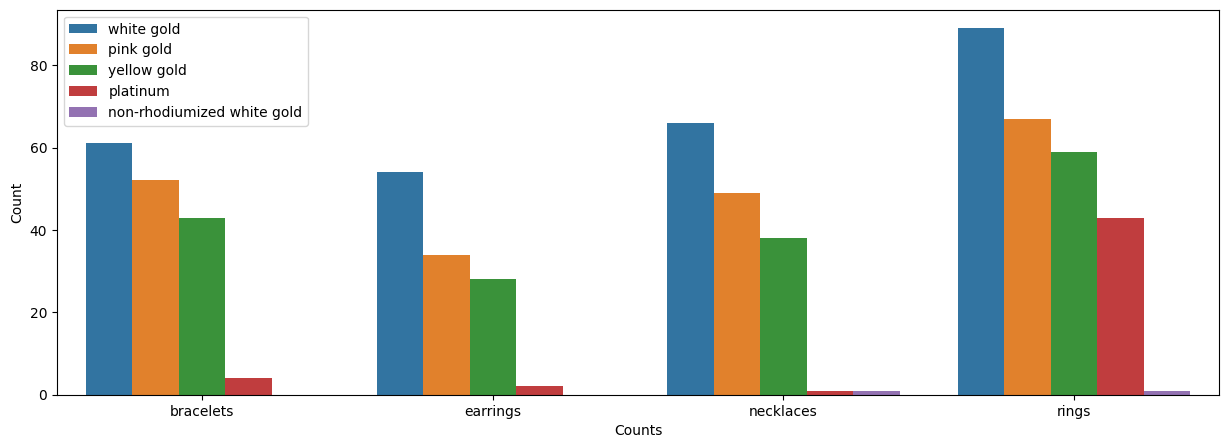

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(x = "categorie", y = "Count", hue = "metal", data = cartier_category_metal)
plt.xlabel('Type')
plt.xlabel('Counts')
plt.legend(loc = "upper left") # đặt vị trí chú thích ở góc bên trái của biểu đồ
plt.show()

- Gía trung bình của đồ trang sức phan theo kim loại là bao nhiêu?

In [56]:
cartier.head()

,categorie,price,metal,first_gen,second_gen,third_gen,fouth_gen
0,rings,1650.0,yellow gold,None,None,None,None
1,rings,3650.0,platinum,None,None,None,None
2,rings,1650.0,pink gold,None,None,None,None
3,rings,1770.0,white gold,None,None,None,None
4,rings,1070.0,yellow gold,None,None,None,None


In [57]:
cartier_gp1 = cartier.groupby(['categorie', 'metal'])['price'].mean().round(2).to_frame()

In [59]:
cartier_gp1 = cartier_gp1.reset_index()

In [60]:
cartier_gp1

,categorie,metal,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21
8,necklaces,non-rhodiumized white gold,19700.00
9,necklaces,pink gold,18284.49


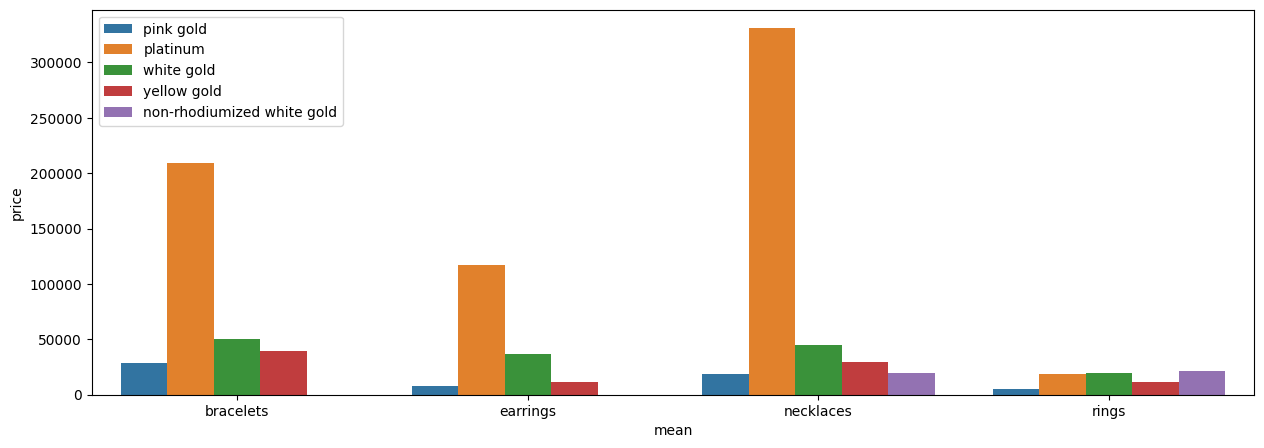

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x = "categorie", y = "price", hue = "metal", data = cartier_gp1)
plt.xlabel('Type')
plt.xlabel('mean')
plt.legend(loc = "upper left") # đặt vị trí chú thích ở góc bên trái của biểu đồ
plt.show()

- Gía trung bình của mỗi kim loại là bao nhiêu?

In [64]:
cartier_metal_mean = cartier.groupby('metal')['price'].mean().round(2).to_frame()

In [66]:
cartier_metal_mean = cartier_metal_mean.reset_index()

In [67]:
cartier_metal_mean

,metal,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


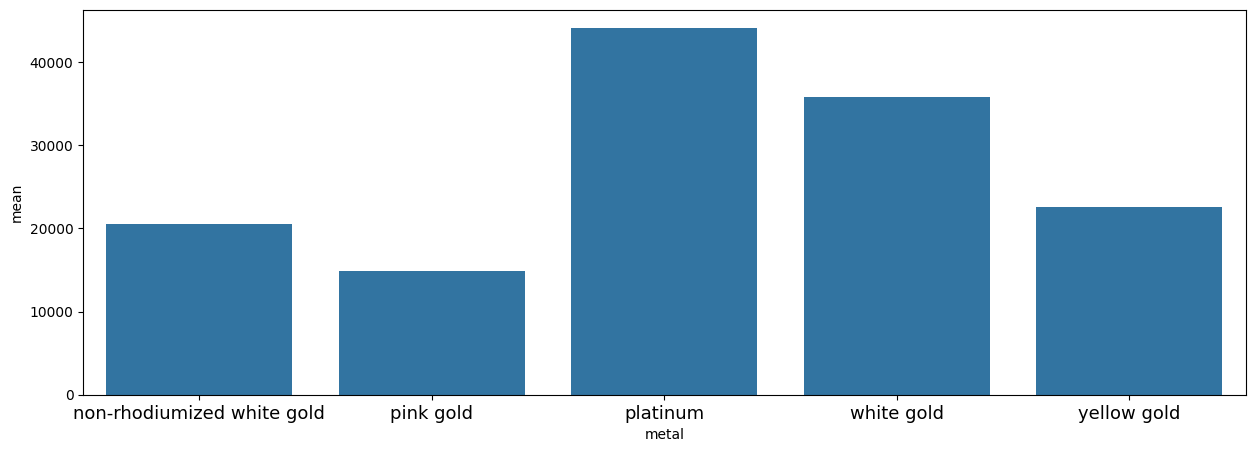

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'metal', y = 'price', data=cartier_metal_mean)
plt.xlabel('metal')
plt.ylabel('mean')
plt.xticks(size = 13)
plt.show()

- Có bao nhiêu trang sức trong mỗi loại sản phẩm?

In [71]:
cartier.head()

,categorie,price,metal,first_gen,second_gen,third_gen,fouth_gen
0,rings,1650.0,yellow gold,None,None,None,None
1,rings,3650.0,platinum,None,None,None,None
2,rings,1650.0,pink gold,None,None,None,None
3,rings,1770.0,white gold,None,None,None,None
4,rings,1070.0,yellow gold,None,None,None,None


In [74]:
cartier_gem = cartier.groupby('categorie')['first_gen'].value_counts().round(2).to_frame()

In [75]:
cartier_gem.columns = ['count']
cartier_gem.reset_index(level = [0, 1], inplace=True)

In [77]:
cartier_gem = cartier_gem[cartier_gem != 0]

In [78]:
cartier_gem

,categorie,first_gen,count
0,bracelets,diamonds,68
1,bracelets,emeralds,15
2,bracelets,diamond,10
3,bracelets,tsavorite garnets,7
4,bracelets,ceramic,5
...,...,...,...
64,rings,chrysoprase,1
65,rings,coral,1
66,rings,pink gold,1
67,rings,sapphire,1


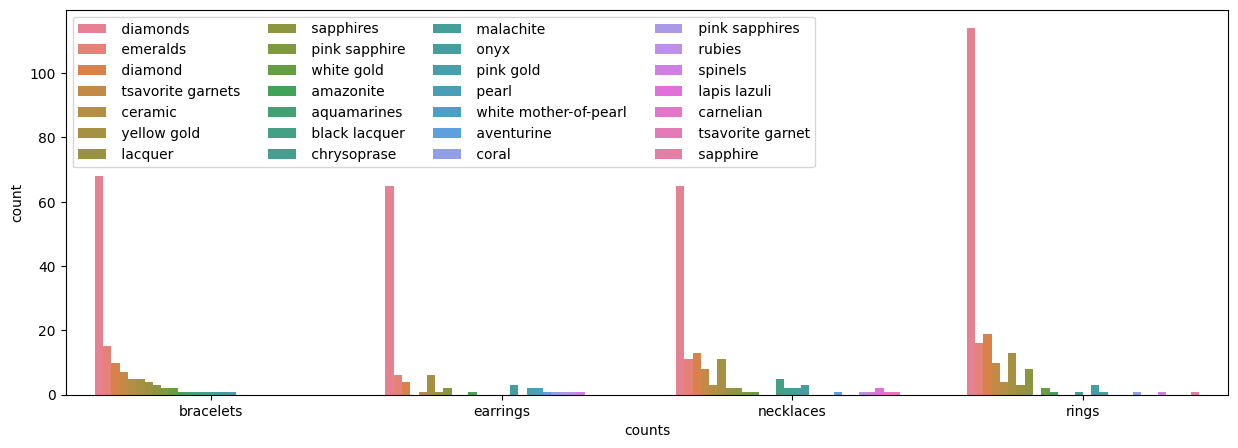

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x = "categorie", y = "count", hue = "first_gen", data = cartier_gem)
plt.xlabel('Type')
plt.xlabel('counts')
plt.legend(ncol = 4,loc = "upper left") # đặt vị trí chú thích ở góc bên trái của biểu đồ
plt.show()

- Gía trung bình của trang sức trong mỗi loại sản phẩm?

In [83]:
cartier_gem_mean = cartier.groupby(['categorie','first_gen'])['price'].mean().round(2).to_frame()

In [86]:
cartier_gem_mean = cartier_gem_mean.reset_index()

In [89]:
cartier_gem_mean = cartier_gem_mean[cartier_gem_mean != 0]

In [90]:
cartier_gem_mean

,categorie,first_gen,price
0,bracelets,amazonite,56000.00
1,bracelets,aquamarines,8250.00
2,bracelets,black lacquer,35000.00
3,bracelets,ceramic,13258.00
4,bracelets,chrysoprase,68500.00
...,...,...,...
64,rings,sapphires,68157.50
65,rings,spinels,18500.00
66,rings,tsavorite garnets,8890.00
67,rings,white gold,4975.00


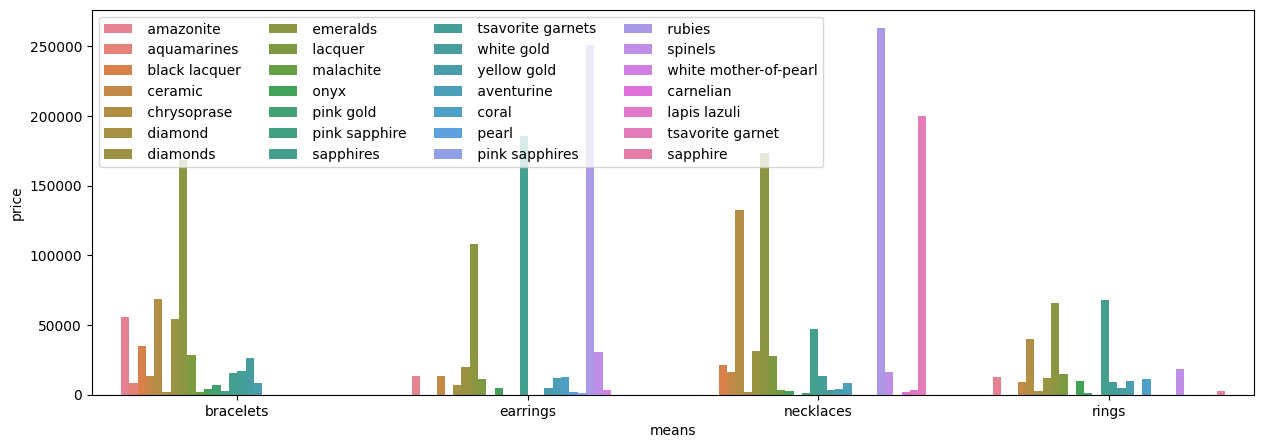

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(x = "categorie", y = "price", hue = "first_gen", data = cartier_gem_mean)
plt.xlabel('Type')
plt.xlabel('means')
plt.legend(ncol = 4,loc = "upper left") # đặt vị trí chú thích ở góc bên trái của biểu đồ
plt.show()

- Top loại trang sức đắt tiền nhất?

In [92]:
cartier

,categorie,price,metal,first_gen,second_gen,third_gen,fouth_gen
0,rings,1650.0,yellow gold,None,None,None,None
1,rings,3650.0,platinum,None,None,None,None
2,rings,1650.0,pink gold,None,None,None,None
3,rings,1770.0,white gold,None,None,None,None
4,rings,1070.0,yellow gold,None,None,None,None
...,...,...,...,...,...,...,...
687,earrings,7500.0,pink gold,None,None,None,None
688,earrings,3900.0,pink gold,None,None,None,None
689,earrings,13700.0,pink gold,diamonds,None,None,None
690,earrings,13700.0,pink gold,amazonite,None,None,None


In [93]:
cartier_gp2_gem = cartier.groupby("first_gen")["price"].mean().round(2).to_frame()

In [94]:
cartier_gp2_gem.reset_index(inplace = True)

In [96]:
cartier_gp2_gem = cartier_gp2_gem[cartier_gp2_gem != 0]

In [97]:
cartier_gp2_gem

,first_gen,price
0,amazonite,27400.00
1,aquamarines,8250.00
2,aventurine,9975.00
3,black lacquer,23390.00
4,carnelian,2180.00
5,ceramic,12726.92
6,chrysoprase,93490.00
7,coral,11850.00
8,diamond,2667.39
9,diamonds,26849.17


In [99]:
cartier_gp2_gem.sort_values("price", ascending = False)

,first_gen,price
19,rubies,257000.00
23,tsavorite garnet,200000.00
10,emeralds,127830.21
6,chrysoprase,93490.00
21,sapphires,70420.67
0,amazonite,27400.00
9,diamonds,26849.17
3,black lacquer,23390.00
11,lacquer,22575.00
22,spinels,21800.00


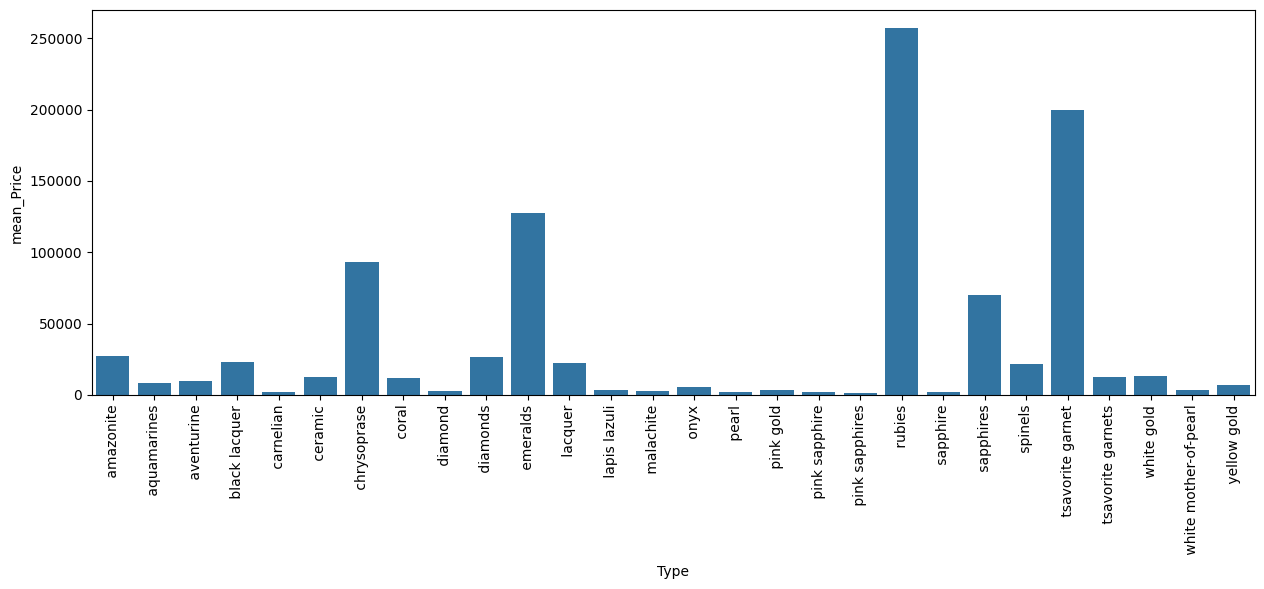

In [101]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'first_gen', y = 'price', data=cartier_gp2_gem)
plt.xlabel('Type')
plt.ylabel('mean_Price')
plt.xticks(rotation = 90)
plt.show()